0.1999999999990898


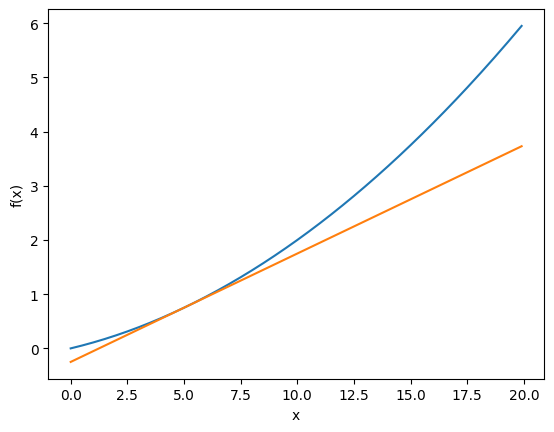

In [ ]:
# gradient_1d.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x          
    return lambda t: d*t + y  # (x,f(x)) 에서의 접선 방정식 표현하고 싶은것! 변수= t , x 는 상수!
     
x = np.arange(0.0, 20.0, 0.1) # x의 본질은 넘파이 1차원 배열
y = function_1(x)   # x 배열(0.1 간격)의 각 원소를 함수의 정의역의 대표원소에 점찍기 한다음 치역의 점찍기를 계산해서 이들을 이은것!!--> y2 도 마찬가지!
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 파이썬 함수로 수학적 함수를 나타낼때 기본적으로 대응 관계를 나타내며, 호출 시 그에 따라 계산된 함수값을 반환한다고 볼 수 있습니다.
# def numerical_diff(f, x):와 같은 함수 정의에서, 매개변수 f는 함숫값이 아닌, 대응 관계를 나타내는 함수 자체를 받게 됩니다.
# 파이썬 함수 그 자체는 항상 어떤 실행 규칙이나 동작을 내포하고 있으며, 이는 수학적 의미(함수의 대응관계 등)를 가질 수도 있고, 그렇지 않을 수도 있습니다.
# 파이썬에서 함수는 일급 객체이기 때문에 변수처럼 활용할 수 있습니다.

(2, 324)


/var/folders/cf/tyg_vn5x2l14jl434v4wh93r0000gn/T/ipykernel_75638/2640736690.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


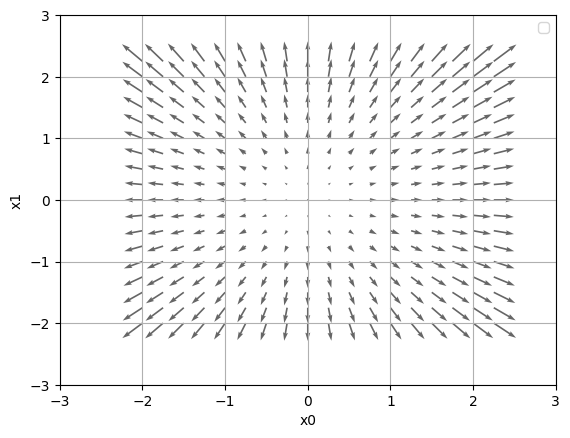

In [ ]:
# gradient_2d.py

# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):  # 파이썬은 함수(대응관계)를 매개변수로 전달할 수 있다!
    if x.ndim == 1:  # 네, 파이썬은 함수를 매개변수로 전달하면, 그 함수의 정의와 동작을 매개변수에 저장하여 사용할 수 있습니다. 
                                # 이는 파이썬에서 **함수가 일급 객체(first-class object)**이기 때문에 가능한 것입니다.
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) # _numerical_gradient_no_batch(f, x) 함수가 호출되고, 여기서 f(x)를 계산하기 위해 function_2가 호출됩니다.
    # 현재 코드 흐름에서 else: return np.sum(x**2, axis=1)는 필요하지 않습니다. 결국 _numerical_gradient_no_batch 에서 function_2가 호출되기때문!(항상 벡터를 입력받는 상황만 존재!)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)       
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten() 
    t= np.array([X, Y])     # t에서 전치하면?--> 한 행이 x,y 에 대한 미분으로 해석하는것! / t에서 전치 안하면?--> 한 행이 x or y에 대한 미분들로만 해석하는것!
    # t.shape?--> (2,324) / 행의 의미?--> 변수 개수 , 열의 의미?--> 격자점의 개수 / 첫번째 변수의 격자점 좌표 , 두번째 변수의 격자점 좌표
    # t.T.shape?-->(324,2)/ 행의 의미?--> 격자점의 개수 , 열의 의미?--> 변수 개수
    grad = numerical_gradient(function_2, t ) # 첫번째 (행)변수의 모든 (열)격자점에 대한 기울기를 구함!--> 기하학적 해석? --> 그 격자점을 지나면서 x 축과 평행하고 x,y 평면과 수직인 평면으로 곡면을 자를 때 생기는 접선의 기울기--> 기울기의 방향?--> x축의 정방향, 반대방향 두개 존재 in 벡터장(2차원)(이해의 key?--> 점을 정사영 연동한다!) if 3차원?--> (1,0,파샬f/파샬x)벡터로 표현된다!(이유는 아직 모름!)
    print(grad.shape)  # t 와 원소의 번째가 그대로 맵핑된다!(사진 참고) / # 두번째 변수의 모든 격자점에 대한 기울기를 구함!--> 이 둘은 no 전치시 해석! / 격자점 X,Y 를 시점으로 하고 다변수 함수의 의 그래디언트를 계산하면, 해당 지점에서 함수의 증가 방향과 그 크기를 알 수 있습니다.
    plt.figure()            # 그래디언트 계산의 시점은 각 격자점이다!!! // 그래디언트 벡터의 크기는 일반적인 벡터의 크기와는 다른 정의를 가진다!(사진참고!)
    plt.quiver(X,Y, grad[0,:], grad[1,:],  angles="xy",color="#666666")# (X,Y) 에서의 grad 를 구해서 각 행의 열끼리 기울기를 계산한다! / grad[0,:]은 각 격자점을 시점으로 하는 그래디언트 벡터의 x 성분 , grad[1,:]은 각 격자점을 시점으로 하는 그래디언트 벡터의 y 성분!! (결과 형태는 (2p,2q) 형태)--> (2p,2q) 형태의 그래디언트 벡터를 가지는 다변수함수는 p^2+q^2+C 뿐이다!-->(p,q)에서 p^2+q^2+C 를 가장 크게 움직일수 있는 방향벡터는 (2p,2q) (그래디언트 벡터)이다!!
    plt.xlim([-3, 3])   # 이해의 key? --> grad[0,:], grad[1,:]가 아닌 다른 1*324 넘파이 배열 2개 생각해보기!
    plt.ylim([-3, 3])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()
# 네, 전치하지 않은 경우 function_2는 "길이 324의 배열을 매개변수로 받는 324변수 함수"로 동작한다고 볼 수 있습니다. / 첫번째 변수의 격자점 좌표 , 두번째 변수의 격자점 좌표--> 이 경우는 function_2를 포물면으로 놓지 않고 포물면의 방향장을 구한 것임! 
# 자기만족?--> 3단원의 사고순서와 비슷!(t 와 원소의 번째가 그대로 맵핑된다!(필기사진 참고)가 첫이유!)
# 그래디언트 벡터를 x,y 평면에서 사고해야만 하는 이유?--> if y,z 평면에서 사고?--> x의 변화 읽기 불가능--> 그래디언트 벡터의 첫번째 원소 해석 불가능--> 끝!
# t를 전치하지 않으면 function_2를 포물면으로 해석하지 않고, 포물면의 방향장을 구하게 되는 것이 맞습니다.
# function_2에서는 입력 배열의 원소 개수 = 변수의 개수로 해석됩니다.
# 그래디언트가 (2x,2y) 인 다변수함수는 왜 x^2+y^2+C 가 유일함이 증명되어 있다!(수학 part!)
# 네, 중앙 차분과 실제 편미분값이 서로 같을 수도 있습니다.
# 다만, 이 경우는 매우 특별한 조건에서 성립합니다. 
# 일반적으로 중앙 차분은 편미분값을 근사하지만, 특정 상황에서는 실제 편미분값과 정확히 일치할 수도 있습니다.
# 사진의 각 열은 모두 x^2+y^2+C 의 그래디언트인 (2x,2y)를 나타낸다!(대응관계가 중요!) 이때 변수를 상수화 하면 특정 점에서의 그래디언트 벡터가 나타난다!(71행 때문에 순서 유지해야 한다!)
# 4단원 전치 안하고 방향장 구하기 이해된 사진.jpg 와 4단원 소스코드 이해필기3.png , 89행 을 동시에 연관지어 생각하면 해결완료! (단 4단원 전치 안하고 방향장 구하기 이해된 사진.jpg에서 상수화된 grad 와 변수화된 grad 를 따로 모두 생각후에 비교한다!)
# a,t 의 본질? --> 각각 그래디언트 벡터의 시점 x,y 좌표
# 2a,2t 의 본질?--> 각각 그래디언트 벡터의 x,y 성분
# 역으로 (2x,2y) 형태의 그래디언트 벡터를 가지는 다변수함수는 x^2+y^2+C 뿐이다!
# 아래 출력된사진 같이 보면 이해 잘됨!
# 그래디언트 벡터의 크기가 크다는 것은 현재 손실 함수의 기울기가 가파르다는 의미입니다.

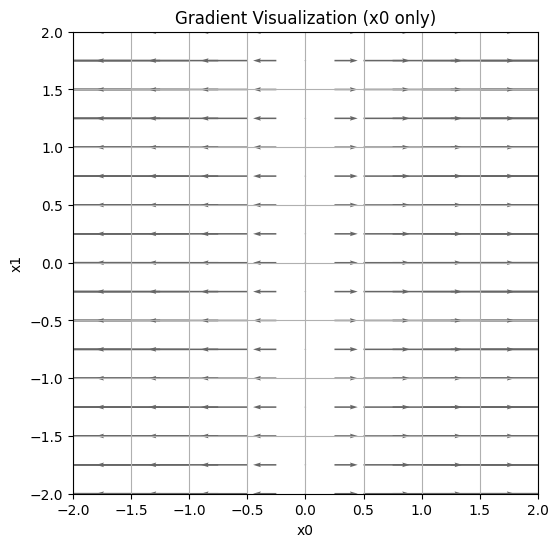

In [38]:
# test

import numpy as np
import matplotlib.pyplot as plt

def function_2(x):
    return np.sum(x**2)  # f(x) = x^2 + y^2

def numerical_gradient_pointwise(f, t):
    """
    각 데이터 포인트에 대해 개별적으로 기울기를 계산.
    """
    h = 1e-4
    grad = np.zeros_like(t)

    # 각 데이터 포인트별로 처리
    for i in range(t.shape[1]):  # t.shape[1] = 데이터 포인트 수 (N)
        tmp_val = t[:, i].copy()

        # f(x+h)
        t[:, i] = tmp_val + np.array([h, 0])  # x 방향으로 h만큼 이동
        fxh1 = f(t[:, i])

        # f(x-h)
        t[:, i] = tmp_val - np.array([h, 0])  # x 방향으로 h만큼 이동
        fxh2 = f(t[:, i])

        # 기울기 계산
        grad[0, i] = (fxh1 - fxh2) / (2 * h)  # x 방향 기울기
        grad[1, i] = 0  # y 방향 기울기는 시각화에서 필요하지 않으므로 0으로 설정

        # 원래 값 복원
        t[:, i] = tmp_val

    return grad

if __name__ == '__main__':
    # 격자 생성
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)  # 격자 생성
    X_flat = X.flatten()  # (N,) 형태로 평탄화
    Y_flat = Y.flatten()  # (N,) 형태로 평탄화

    # 데이터를 t에 저장 (전치하지 않음)
    t = np.array([X_flat, Y_flat])  # (2, N)

    # 첫 번째 변수 (x0)에 대한 기울기만 계산
    grad = numerical_gradient_pointwise(function_2, t)  # grad.shape = (2, 324)
    grad_x0 = grad[0]  # 첫 번째 변수 (x0) 방향 기울기만 추출

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.quiver(X_flat, Y_flat, grad_x0, np.zeros_like(grad_x0), angles="xy", color="#666666", scale=10)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.title("Gradient Visualization (x0 only)")
    plt.grid()
    plt.show()


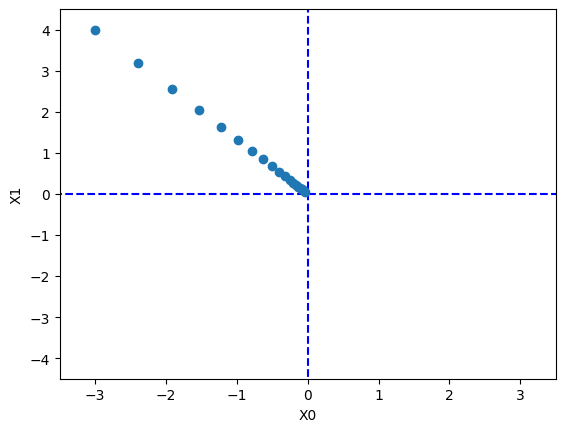

In [ ]:
# gradient_method.py


# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from modules.gradient_2d import numerical_gradient      

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())    # x.copy() 의 역할?--> 새로운 객체를 만들어서 id 의 변화를 주는것!(연동 안되게!) / x.copy() 와 x 의 id는 다르다!

        grad = numerical_gradient(f, x)

        x -= lr * grad  # i가 0일때, 18행을 인식했을때 x_history의 원소는 바뀌지 않는다! when? x.copy() 사용시! 안사용시?--> 현재 값으로 업데이트 된다!
    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 파이썬에서는 변수는 객체의 주소를 저장한다 but, print 함수는 변수의 참조가 아닌 객체의 값을 출력하도록 설계되어 있다!
# 불변 객체 (예: 정수, 문자열): x += 1은 새로운 객체를 생성하여 x에 할당합니다. 따라서 id(x)는 변경됩니다.
# 가변 객체 (예: 리스트, NumPy 배열): x += 1 은 객체 자체를 수정합니다. 즉, 새로운 객체를 생성하지 않고 기존 객체를 변경합니다. 따라서 id(x)는 동일하게 유지됩니다.
# 18행 경사하강법의 코드에서 넘파이 배열은 가변 객체이므로 -= 연산을 하기 전과 후는 동일한 id를 갖는다. 현재와 과거의 x 값은 마지막 변경된 값(현재 값)을 취한다! 
# what is 객체 자체를 수정한다 함?--> 새로운 객체를 만들지 않고 그 객체의 값을 변경시키는것!--> id 가 동일 --> 같은 값 공유(연동)
# x -= lr * grad 을 하는 순간 과거의 x(들)은 항상 현재의 x로 바뀐다!--> x 들의 id 가 서로 동일하기 때문!
# gradient_2d.py 의 0번째 들여쓰기는 모두 인식된다!
# 네, 모듈이 로드되면 0번째 들여쓰기의 모든 함수와 클래스의 정의와 그 내용까지 메모리에 로드됩니다.
# x 가 가변 객체든 불변 객체든지 간에, x=x+1은 새로운 객체를 생성한다!
# x 가 가변 객체이면 x+=1 은 새로운 객체를 만들지 않고 기존의 객체 값을 수정한다 
# x+=1의 효과?-->x의 값을 1만큼 증가시켜서 x에 저장하는 역할! / x의 값을 1만큼 증가시킨 존재는 새로운 객체가 아니다!(기존의 객체다!)
# 연산을 수행하기 전과 후의 존재의 id 를 생각하는 중!
# x.copy() 사용시에는 새로운 객체를 만들어서 id 가 서로 달라지므로 연동 X

In [ ]:
# gradient_simplenet.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

# 인스턴스를 생성한 후 해당 인스턴스로 호출! & 객체에 속함(객체. ... 으로 정의됨!)--> 인스턴스 메서드의 특징!

# 맞습니다! **f = lambda w: net.loss(x, t)**는 실제로 기울기 계산을 위한 함수로 사용되며, 그 자체로는 큰 의미를 가지지 않지만, **numerical_gradient(f, net.W)**에서 그 역할이 중요하게 드러납니다.

# f = lambda w: net.loss(x, t)에서 f는 w를 입력받는 함수로 정의되어 있습니다. 하지만 실제로 w는 f 안에서 사용되지 않으며, 대신 net.loss(x, t)를 호출합니다. 즉, f는 손실 함수를 호출하는 역할을 합니다.

# f = lambda w: net.loss(x, t)**에서 **f**는 net.loss(x, t)를 호출하는 함수로 정의되어 있습니다. net.loss(x, t)는 net.W(가중치 행렬)에 의존하며, net.W가 변할 때마다 손실 값도 변합니다.    

# 람다함수 사진 참고

[[ 0.22847109  0.25044785 -0.47891894]
 [ 0.34270664  0.37567177 -0.71837841]]


In [ ]:
# test

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):         
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

# 더 명시적인 버전
def f(w):
    original_W = net.W.copy()  # 기존 가중치 저장  / 변형된것을 백업한것(원본 아님!) 연동논리!
    net.W = w                  # 새 가중치로 설정
    loss = net.loss(x, t)      # 손실 계산
    net.W = original_W         # 기존 가중치 복원
    return loss

dW = numerical_gradient(f, net.W)

print(dW)

# x와 net.W는 같은 메모리 공간을 가리킴
# x를 수정하면 net.W도 같이 수정됨
# Python에서 객체(여기서는 NumPy 배열인 net.W)를 함수의 매개변수로 전달할 때, 그 객체의 참조(메모리 주소)가 전달됩니다.
# net.W[0][0]이 아무리 더럽혀져도 gradient.py에서 값 복원하면 자동으로 연동되서 net.W[0][0]값이 원상복구 된다!!!

[[ 0.1432292   0.2819556  -0.42518481]
 [ 0.2148438   0.4229334  -0.63777721]]


train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.7928333333333333, 0.8015
train acc, test acc | 0.8774166666666666, 0.8816
train acc, test acc | 0.8977833333333334, 0.901
train acc, test acc | 0.9071833333333333, 0.9091
train acc, test acc | 0.9148666666666667, 0.9163
train acc, test acc | 0.9194666666666667, 0.9214
train acc, test acc | 0.9247166666666666, 0.9261
train acc, test acc | 0.9280333333333334, 0.9293
train acc, test acc | 0.93025, 0.9311
train acc, test acc | 0.9340666666666667, 0.9346
train acc, test acc | 0.9364833333333333, 0.9358
train acc, test acc | 0.93945, 0.9372
train acc, test acc | 0.9405, 0.939
train acc, test acc | 0.9435, 0.9408
train acc, test acc | 0.9447, 0.9439
train acc, test acc | 0.9467833333333333, 0.9441


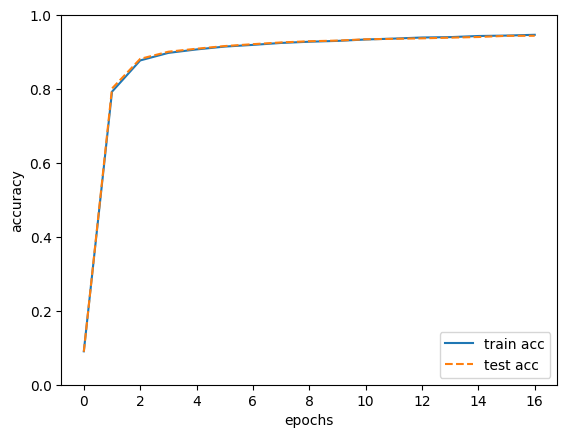

In [1]:
# train_neuralnet.py
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from modules.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [18]:
# two_layer_net.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
